In [32]:
from __future__ import division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 24
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
from kid_readout.measurement import basic
from kid_readout.measurement.io import nc

In [2]:
ncf = nc.NCFile('/data/readout/2016-04-28_145106_dark_28_dB_dac.nc')

In [4]:
ssa = basic.SweepStreamArray(sweep_array=ncf.SweepArray0, stream_array=ncf.StreamArray1)

In [7]:
ssa.stream_array.frequency_MHz

array([ 104.29345703,  110.99169922,  201.10693359,  195.43994141,
        193.61181641,  170.515625  ,  145.65185547,  141.12353516])

In [16]:
good_numbers = [0, 1, 3, 4, 5, 6, 7]
bad_numbers = [2]

In [22]:
good_ss = [ssa.sweep_stream(number) for number in good_numbers]

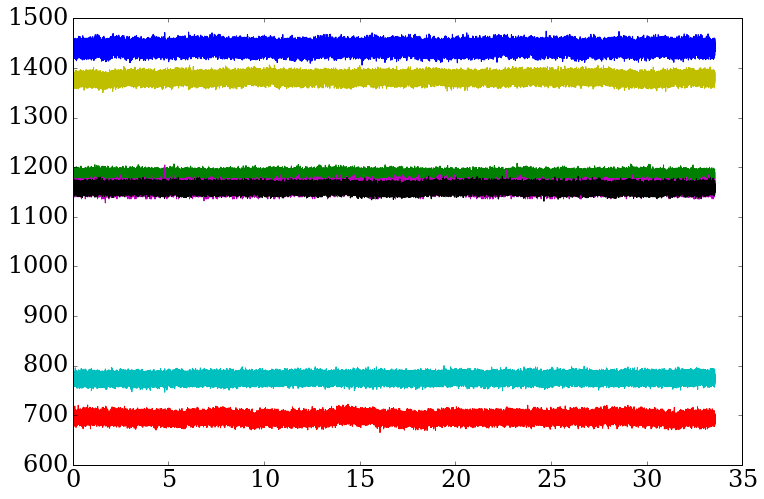

In [23]:
fig, ax = plt.subplots()

for ss in good_ss:
    ax.plot(ss.stream.sample_time,
            np.abs(ss.stream.s21_raw),
            '-')
    

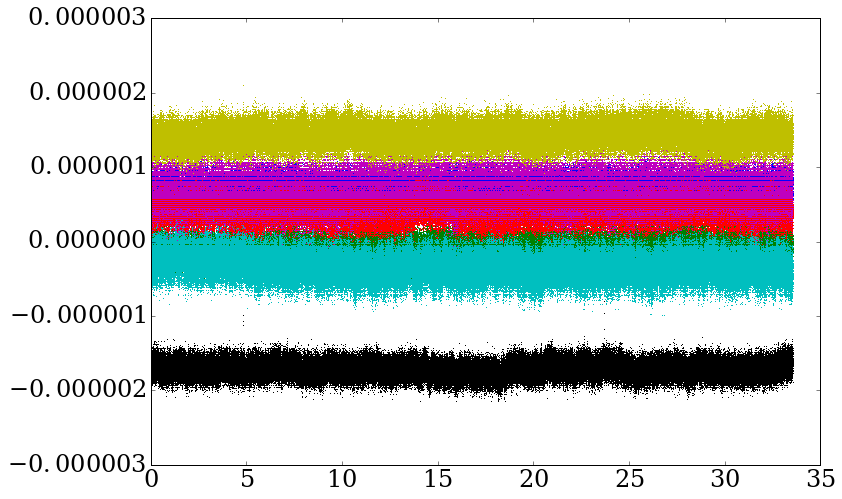

In [24]:
fig, ax = plt.subplots()

for ss in good_ss:
    ax.plot(ss.stream.sample_time,
            ss.x,
            ',', label=str(number))

#ax.legend(loc='best');

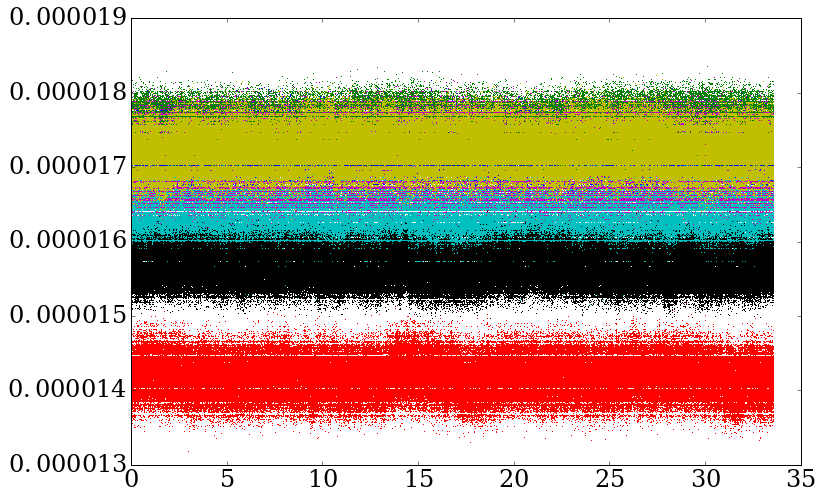

In [25]:
fig, ax = plt.subplots()

for ss in good_ss:
    ax.plot(ss.stream.sample_time,
            ss.q,
            ',', label=str(number))

#ax.legend(loc='best');

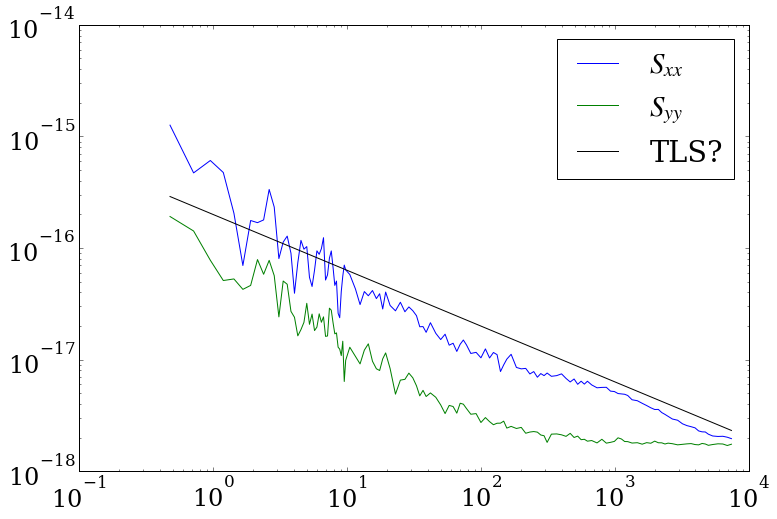

In [59]:
ss = good_ss[4]
ss._set_S(window=plt.mlab.window_hanning)
#ss._set_S()
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

start = 2
ax.plot(ss.S_frequency[start:], ss.S_xx[start:], label='$S_{xx}$')
ax.plot(ss.S_frequency[start:], ss.S_yy[start:], label='$S_{yy}$')
ax.plot(ss.S_frequency[start:], 2e-16 * ss.S_frequency[start:]**(-1/2), '-k', label='TLS?')
ax.legend(loc='best');

In [27]:
ss.S_frequency[:3]

array([ 0.        ,  0.23841858,  0.47683716])

In [39]:
bad_ss = ssa.sweep_stream(bad_numbers[0])

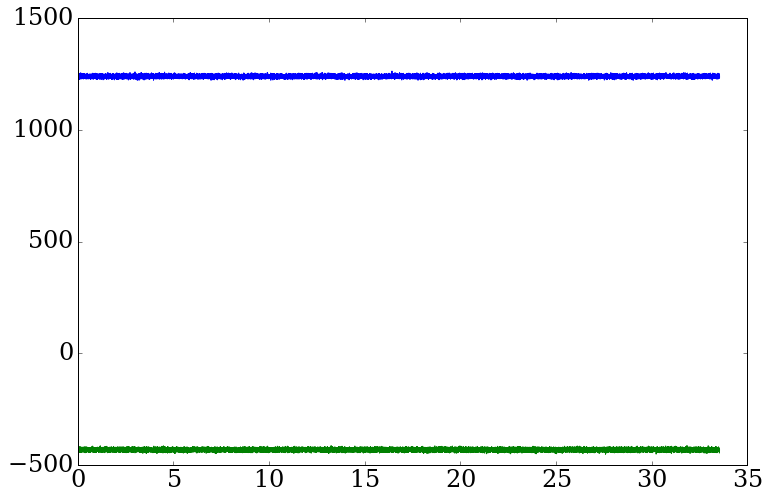

In [42]:
stride = 10
fig, ax = plt.subplots()
ax.plot(bad_ss.stream.sample_time[::stride], bad_ss.stream.s21_raw.real[::stride])
ax.plot(bad_ss.stream.sample_time[::stride], bad_ss.stream.s21_raw.imag[::stride])

In [45]:
counts_real, bins_real = np.histogram(bad_ss.stream.s21_raw.real, bins=100)
counts_imag, bins_imag = np.histogram(bad_ss.stream.s21_raw.imag, bins=100)

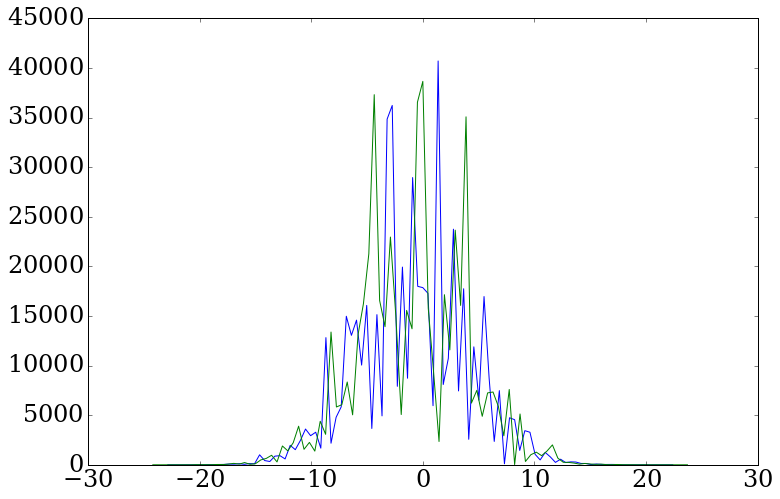

In [48]:
fig, ax = plt.subplots()
ax.plot(bins_real[:-1] - bins_real.mean(), counts_real, '-')
ax.plot(bins_imag[:-1] - bins_imag.mean(), counts_imag, '-')

In [ ]:
fig, ax = plt.subplots()
